In [74]:
import numpy as np
import sympy
import math
import matplotlib.pyplot as plt
%matplotlib inline

[-0.5, 0.5, -0.2, 1]

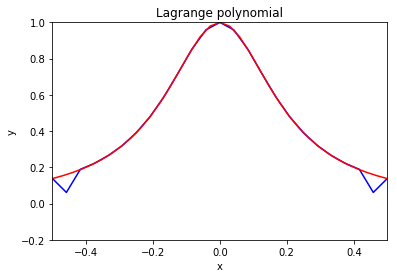

In [9]:
#Задаем функцию для счета полиномов Лагранжа
def f(x):
    return 1.0 / (1.0 + 25*x**2)

n = 15
xx = np.linspace(-1, 1, n)
yy = f(xx)

def lagrange_k(xval, xk, k):
    n = len(xk)
    num, den = 1.0, 1.0 
    for j in range(n):
        if j == k: 
            continue
        den *= (xk[k] - xk[j])
        num *= (xval - xk[j])
    return num / den

def lagrange(xval, xk, yk):
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))

#Фитуем функцию через полиномы Лагранжа
var_x = np.linspace(-0.5, 0.5, 25)
var_y = [lagrange (a, xk, yk) for a in var_x]


plt.plot (var_x, var_y, 'b-') #полином Лагранжа
plt.plot (xk, f(xk), 'r-') #исходная функция
plt.ylabel ('y')
plt.xlabel ('x')
plt.title ('Lagrange polynomial')
plt.axis ([-0.5, 0.5, -0.2, 1])
#Ошибки вычислений
err = var_y - yy

[-0.5, 0.5, -0.2, 1]

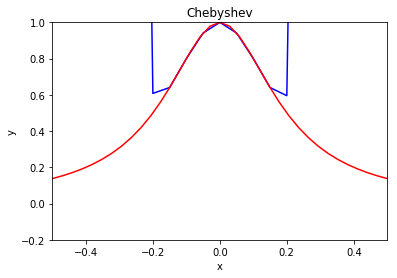

In [75]:
#задаем функцию для вычисления узлов через Чебышева
v = 18
dn = np.linspace (-0.5, 0.5, uz) #генерация равномерно отстоящих узлов в отрезке -1, 1
xcheb = [np.cos(2*m+1)/v*0.5*math.pi for m in range (v-1)]
ycheb = [f(xcheb[m]) for m in range (v-1)]
sy = [lagrange(t, xcheb, ycheb) for t in dn]

plt.plot (dn, sy, 'b-') 
plt.plot (xk, f(xk), 'r-') #исходная функция
plt.ylabel ('y')
plt.xlabel ('x')
plt.title ('Chebyshev')
plt.axis ([-0.5, 0.5, -0.2, 1])

/opt/conda/lib/python3.6/site-packages/numpy/polynomial/_polybase.py:804: RankWarning: The fit may be poorly conditioned
  res = cls._fit(xnew, y, deg, w=w, rcond=rcond, full=full)


[-0.5, 0.5, -0.2, 1]

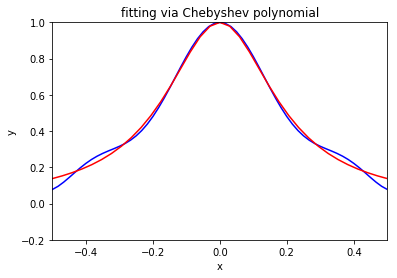

In [72]:
#Чебышев 2
ax = np.linspace(-0.5, 0.5 , 61)
Cheb = np.polynomial.Chebyshev.fit(xx, yy, 15)

plt.plot (ax, Cheb(ax), 'b-') 
plt.plot (xk, f(xk), 'r-') #исходная функция
plt.ylabel ('y')
plt.xlabel ('x')
plt.title ('fitting via Chebyshev polynomial')
plt.axis ([-0.5, 0.5, -0.2, 1])